# LINMA2472:  Homework 4
## SIR epidemiology model over networks

In [113]:
# imports, note scipy>=1.8 is needed
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import collections
from matplotlib.ticker import MaxNLocator
import statistics as stats
from collections import Counter
import seaborn as sns
from matplotlib import rc
import pandas as pd
import csv
import sklearn.cluster
import scipy
import plotly
import plotly.graph_objs as go
import random
import copy
import sklearn #pip install scikit-learn
import plotly.io as pio
import plotly.express as px
from community import community_louvain #pip install python-louvain
import plotly
import plotly.graph_objs as go
import time
import seaborn as sns
#from igraph import *
pio.renderers.default = "notebook"
print("done")

done


## 1. Text traitement

In [114]:
book = []
with open('iliad.txt', "r", encoding="utf8" ) as input_f:  #if error: erase encoding="utf8"
    book = input_f.read()
    book = book.lower()
    book = list(filter(lambda x : x != '', book.split('\n\n')))
    
characters = []
with open('iliad_characters.txt', 'r') as char:
    characters = char.read()
    characters = list(filter(lambda x : x != '', characters.split('\n')))

list_to_delete = ['come', 'dear', 'first', 'go', 'may', 'nay', 'mt', 'o', 'son', 'sir', 'sleep', 'stand', 'thus', "king", "achaean", "trojan", "trojans","o","argives"]
#if character is in list_to_delete, delete it
for character in characters:
    if character in list_to_delete:
        characters.remove(character)


#export New characters in txt file one character per line
with open('characters.txt', 'w') as f:
    for item in characters:
        f.write("%s \n" % item)
        


In [115]:
characters

['hector',
 'jove',
 'achilles',
 'priam',
 'ajax',
 'agamemnon',
 'patroclus',
 'menelaus',
 'atreus',
 'minerva',
 'peleus',
 'juno',
 'mars',
 'apollo',
 'tydeus',
 'ilius',
 'nestor',
 'olympus',
 'aeneas',
 'diomed',
 'saturn',
 'troy',
 'idomeneus',
 'neptune',
 'antilochus',
 'sarpedon',
 'hades',
 'telamon',
 'ida',
 'alexandrus',
 'helen',
 'ulysses',
 'iris',
 'meriones',
 'thetis',
 'teucer',
 'phoebus apollo',
 'menoetius',
 'vulcan',
 'ajaxes',
 'polydamas',
 'king agamemnon',
 'argos',
 'venus',
 'o',
 'antenor',
 'glaucus',
 'deiphobus',
 'pallas minerva',
 'oileus',
 'lycaon',
 'automedon',
 'father jove',
 'mercury',
 'aeacus',
 'lycia',
 'oceanus',
 'paris',
 'idaeus',
 'phthia',
 'myrmidons',
 'neleus',
 'alas',
 'gerene',
 'asius',
 'xanthus',
 'dardanus',
 'agenor',
 'diana',
 'forthwith',
 'thoas',
 'hercules',
 'eurypylus',
 'machaon',
 'panthous',
 'phoenix',
 'briseis',
 'danaan',
 'bellerophon',
 'leto',
 'argus',
 'scamander',
 'thebes',
 'scaean',
 'laomedon

In [ ]:
#add 1 if a specific personnage is in a specific page
occurence_page = pd.DataFrame(0,columns=characters, index=(i for i in range(len(book))))
for i in range(len(book)):
    for personnage in characters:
        if personnage in book[i]:
            occurence_page.loc[[i], [personnage]] += 1
            

In [ ]:
#create the confusion matrix by dot product
occurence = occurence_page.T.dot(occurence_page)
#fill diagonal with 0
np.fill_diagonal(occurence.values, 0)


In [ ]:
#drop all rows filled with zeros i.e. characters (from csv data file) having no interactions
occurence = occurence.loc[(occurence != 0).any(axis=1)]
for i in occurence.columns:
    if i not in occurence.index:
        occurence.drop(i, axis=1, inplace=True)
occurence.to_csv('./occurence.csv')
occurence.head()

,hector,jove,achilles,priam,ajax,agamemnon,patroclus,menelaus,atreus,minerva,...,melanippus,cebriones,euphorbus,pirithous,nine,peteos,mycenae,elis,meleager,antiphus
hector,0,109,83,77,59,27,50,24,18,31,...,2,7,4,0,7,1,1,0,0,1
jove,109,0,71,50,34,54,26,24,43,63,...,1,1,2,4,8,1,2,1,1,0
achilles,83,71,0,54,25,47,68,12,37,25,...,0,1,4,1,9,0,0,2,0,2
priam,77,50,54,0,17,19,9,14,11,20,...,1,3,1,1,8,0,1,0,0,2
ajax,59,34,25,17,0,18,19,22,16,4,...,2,3,1,0,1,3,0,0,0,1


## 2. Networks study

In [ ]:
#Here we need to set the nodes and edges of the graph to create it

#list of all characters appearing in the text to set the nodes of the graph
nod=[]
for i in occurence.index:
    nod.append(str(i).strip("/(),'"))

#set the edges of the graph
edg=[]
for i in range(len(occurence)):
    for j in range(len(occurence)):
        if occurence.iloc[i,j] != 0:
            edg.append( (str(occurence.index[i]).strip("/(),'"),
                         str(occurence.index[j]).strip("/(),'"),
                        occurence.iloc[i,j]) )

In [ ]:
print(edg[3])
print(nod)

('hector', 'ajax', 59)
['hector', 'jove', 'achilles', 'priam', 'ajax', 'agamemnon', 'patroclus', 'menelaus', 'atreus', 'minerva', 'peleus', 'juno', 'mars', 'apollo', 'tydeus', 'ilius', 'nestor', 'olympus', 'aeneas', 'diomed', 'saturn', 'troy', 'idomeneus', 'neptune', 'antilochus', 'sarpedon', 'hades', 'telamon', 'ida', 'alexandrus', 'argives', 'helen', 'ulysses', 'iris', 'meriones', 'thetis', 'teucer', 'phoebus apollo', 'menoetius', 'vulcan', 'ajaxes', 'polydamas', 'king agamemnon', 'argos', 'venus', 'o', 'antenor', 'glaucus', 'deiphobus', 'pallas minerva', 'oileus', 'lycaon', 'automedon', 'father jove', 'mercury', 'aeacus', 'lycia', 'oceanus', 'paris', 'idaeus', 'phthia', 'myrmidons', 'neleus', 'alas', 'gerene', 'asius', 'xanthus', 'dardanus', 'agenor', 'diana', 'forthwith', 'thoas', 'hercules', 'eurypylus', 'machaon', 'panthous', 'phoenix', 'briseis', 'danaan', 'bellerophon', 'leto', 'argus', 'scamander', 'thebes', 'scaean', 'laomedon', 'asteropaeus', 'phyleus', 'acamas', 'dolon', 'p

### 2.1 Simple spring network

In [ ]:
G=nx.Graph()
G.add_nodes_from(nod)
G.add_weighted_edges_from(edg)
weight=nx.get_edge_attributes(G,'weight')

The average degree of a node is 52.353


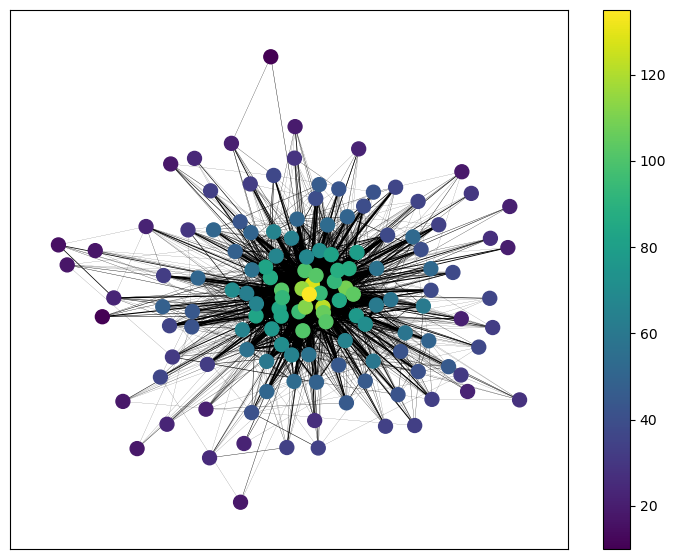

In [ ]:
# Spring plot to vizualize communities
# Gradient color correspond to nodes degree
plt.figure(figsize=(9,7))
pos_spring = nx.spring_layout(G, seed=4, k=0.5)
deg = [val for (node, val) in G.degree()]

weight_of_edges = list(nx.get_edge_attributes(G, "weight").values())
print('The average degree of a node is '+ str(round(np.mean(deg),3)))
norm_weight = (np.array(weight_of_edges)-min(weight_of_edges))/(max(weight_of_edges)-min(weight_of_edges))

node = nx.draw_networkx_nodes(G, pos=pos_spring, node_size=100, cmap='viridis', node_color=deg)
nx.draw_networkx_edges(G, pos=pos_spring, alpha=1, width=norm_weight*30, edge_color='black')
plt.colorbar(node)
#plt.title('Coloring based on nodes degree')
#plt.savefig('./spring_network_gradient', dpi=500)
plt.show()

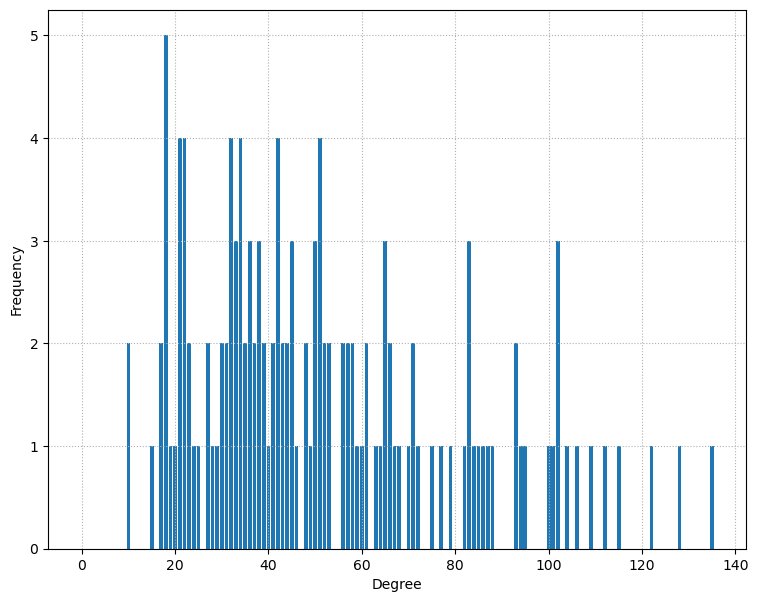

In [ ]:
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(9, 7))
plt.bar(degrees, degree_freq)
plt.grid(linestyle=':')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.savefig('./degree_distribution', dpi=300)
plt.show()

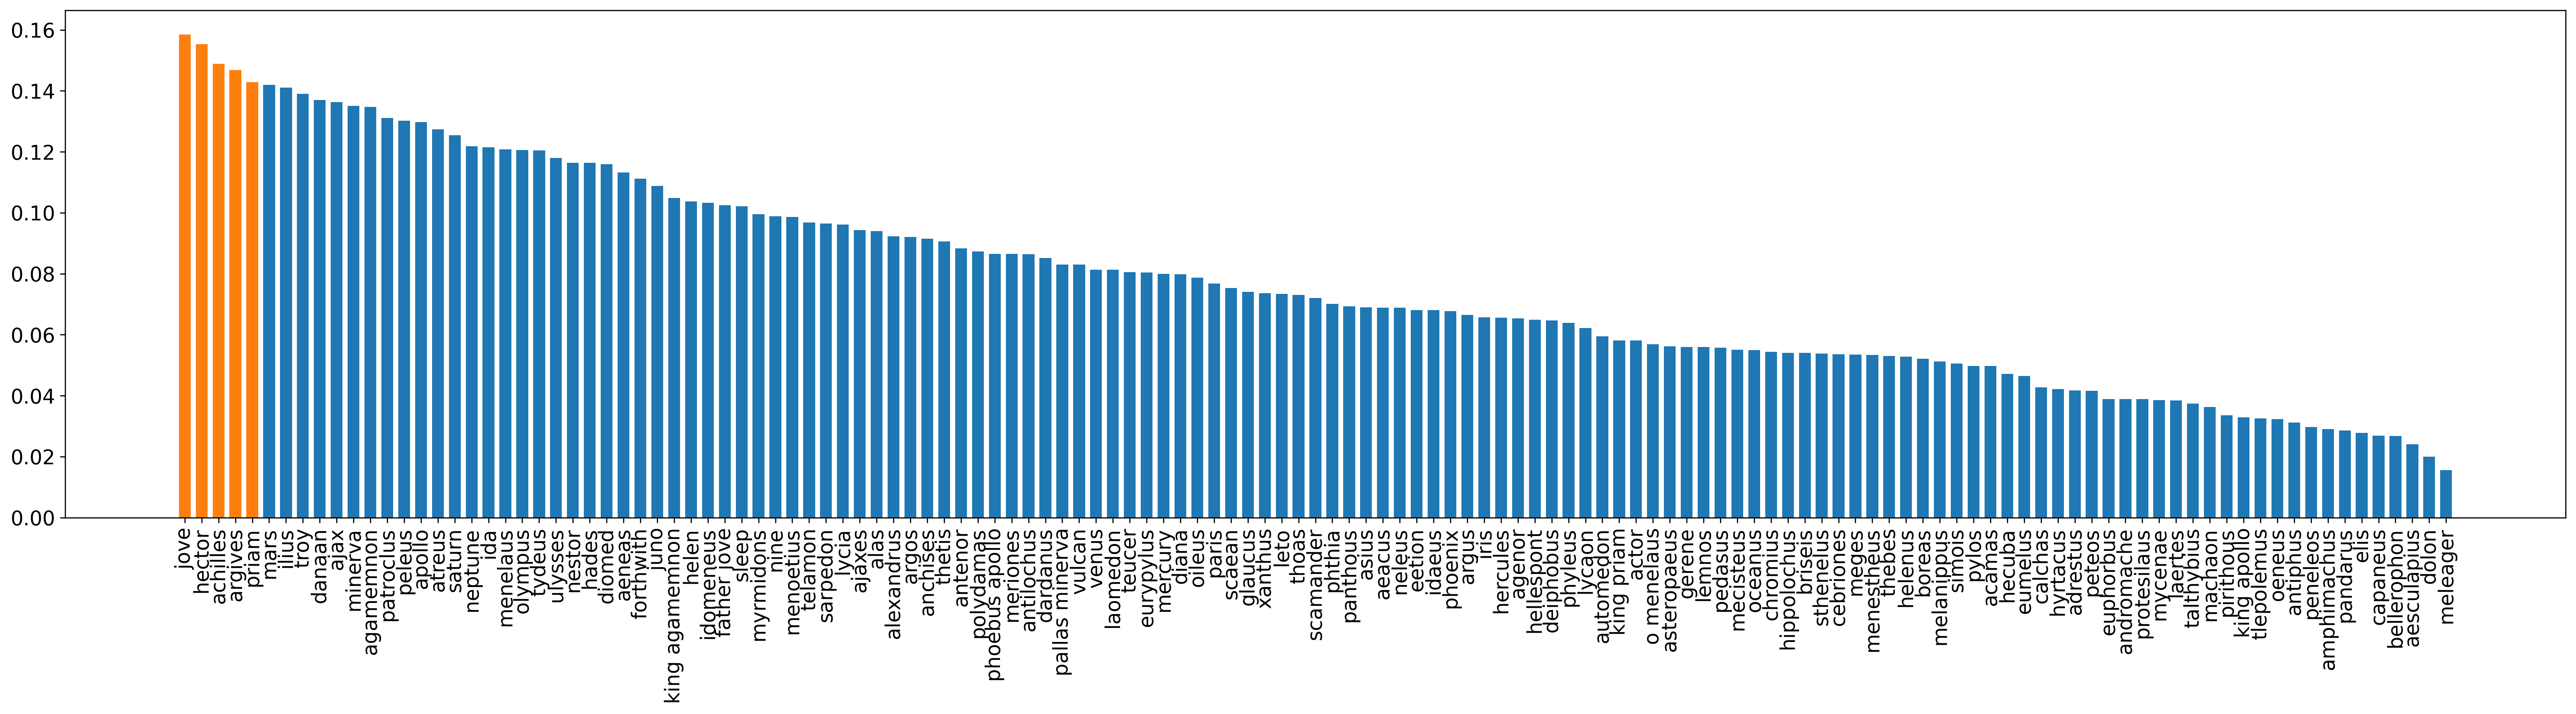

In [ ]:
#eigen centrality 
eigen_centrality = nx.eigenvector_centrality(G)
sorted_eigen_centrality =  sorted(eigen_centrality.items(), key=lambda x:x[1], reverse=True)

#print(eigen_centrality)

plt.figure(figsize=(25,7), dpi=300)
for i in range(1,len(sorted_eigen_centrality)):
    plt.bar(sorted_eigen_centrality[i][0], sorted_eigen_centrality[i][1], 
            color='tab:orange' if i<=5 else 'tab:blue',
            width=0.7)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
#plt.savefig('images/eigen_centrality.png', dpi=500)
#plt.savefig('images/eigen_centrality.svg', format='svg', dpi=500)
plt.show()

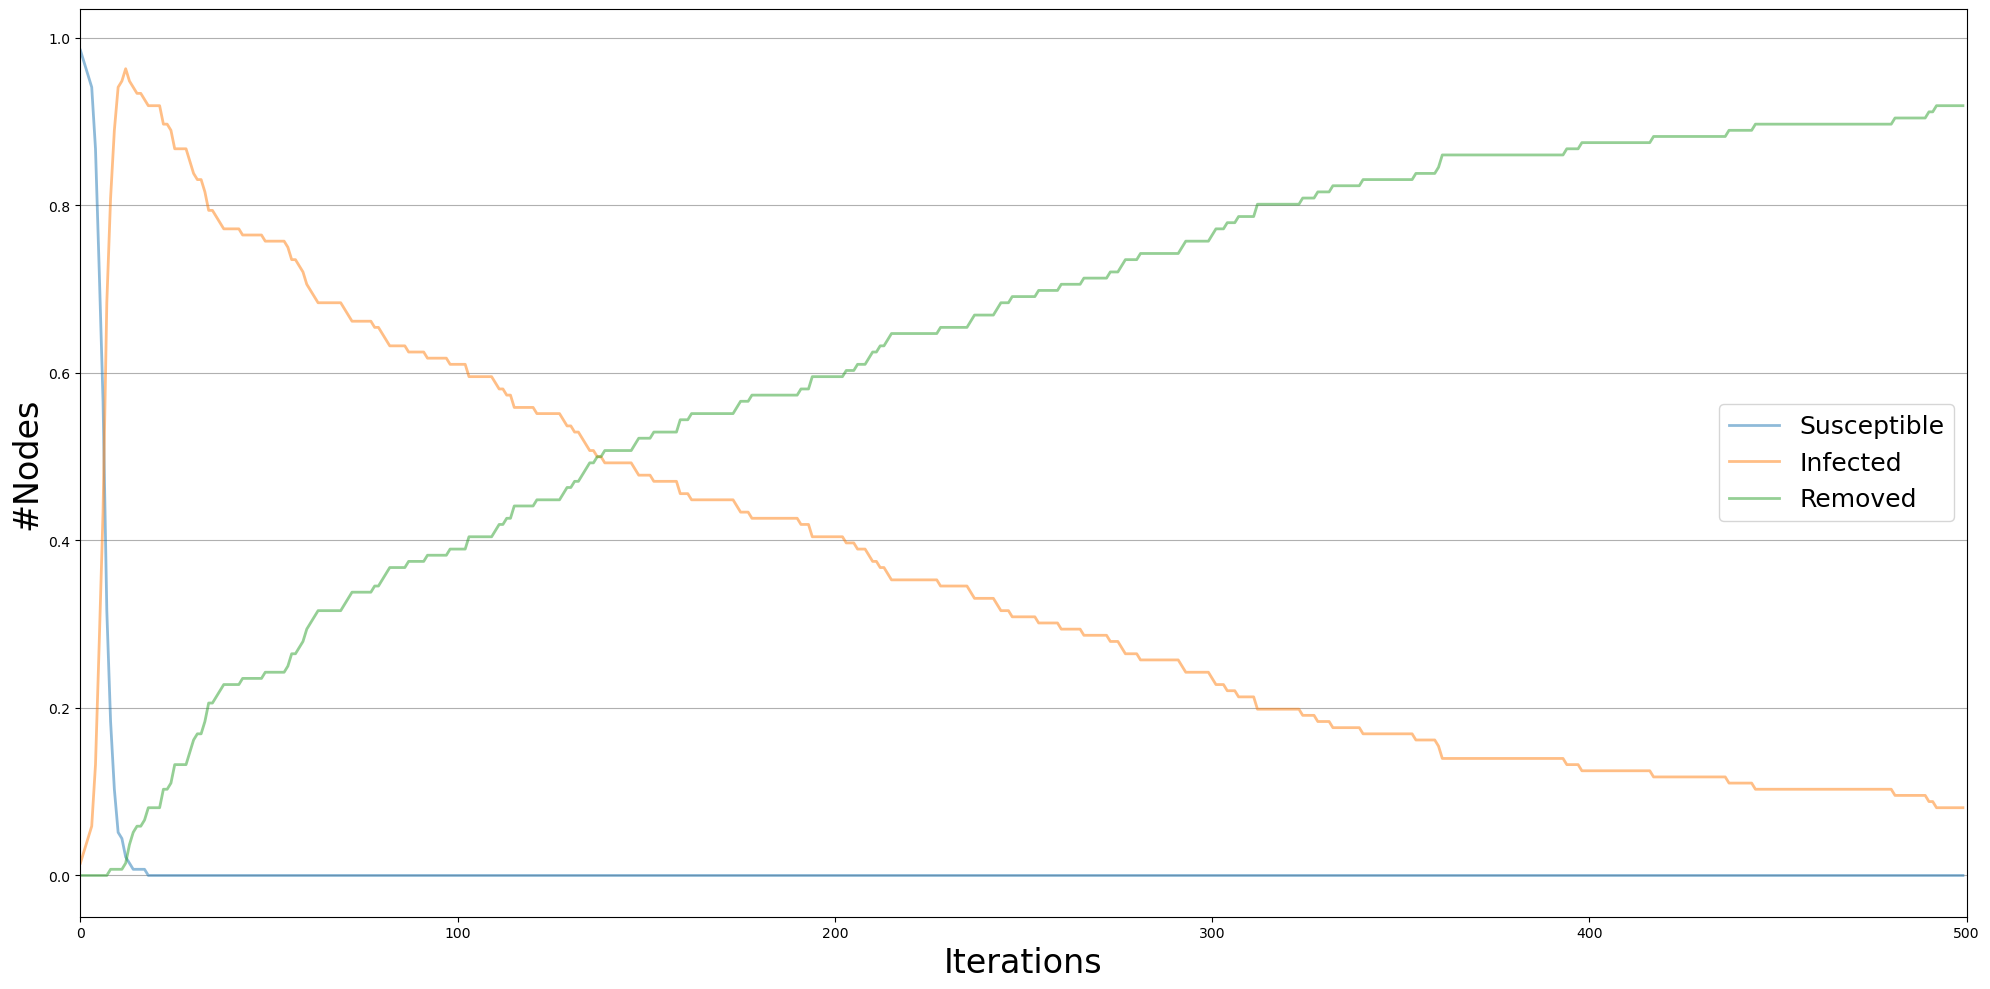

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import dynetx as dn
import ndlib.models.ModelConfig as mc
import ndlib.models.dynamic as dm
from past.builtins import xrange
import ndlib.models.epidemics as ep
from ndlib.utils import multi_runs
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
import warnings
from bokeh.io import output_notebook, show
warnings.filterwarnings("ignore")
%matplotlib inline

# Network topology
g = G               # 1000 nodes with 10% probability of edge creation

# Model selection
model  = ep.SIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.02)                   # Infection probability     S -> I
cfg.add_model_parameter('gamma', 0.005)                 # Removal probability       I -> R
cfg.add_model_parameter("fraction_infected", 0.02)      # 50 infected nodes at start in the network 
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

# Show simulation
viz = DiffusionTrend(model, trends)
p=viz.plot()
#show(p)


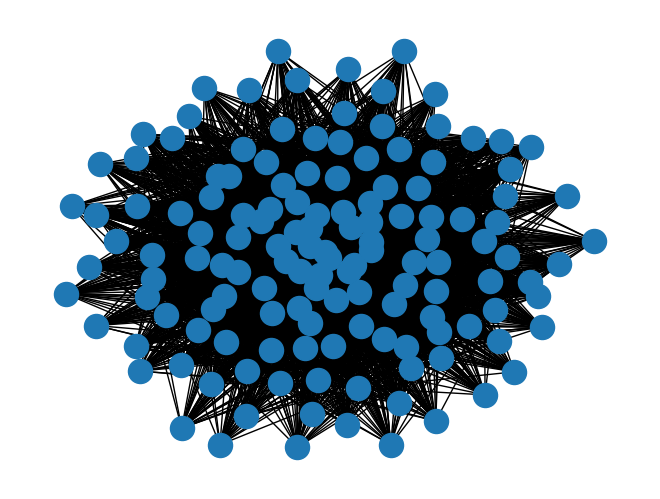

In [ ]:
degree = [degI for (name, degI) in G.degree()]
barabasiAlbert = nx.barabasi_albert_graph(138, int(np.mean(degree)))
nx.draw(barabasiAlbert)

### Networks

In [ ]:
print(len(characters))

136


In [ ]:
characters

['hector',
 'jove',
 'achilles',
 'priam',
 'ajax',
 'agamemnon',
 'patroclus',
 'menelaus',
 'atreus',
 'minerva',
 'peleus',
 'juno',
 'mars',
 'apollo',
 'tydeus',
 'ilius',
 'nestor',
 'olympus',
 'aeneas',
 'diomed',
 'saturn',
 'troy',
 'idomeneus',
 'neptune',
 'antilochus',
 'sarpedon',
 'hades',
 'telamon',
 'ida',
 'alexandrus',
 'argives',
 'helen',
 'ulysses',
 'iris',
 'meriones',
 'thetis',
 'teucer',
 'phoebus apollo',
 'menoetius',
 'vulcan',
 'ajaxes',
 'polydamas',
 'king agamemnon',
 'argos',
 'venus',
 'o',
 'antenor',
 'glaucus',
 'deiphobus',
 'pallas minerva',
 'oileus',
 'lycaon',
 'automedon',
 'father jove',
 'mercury',
 'aeacus',
 'lycia',
 'oceanus',
 'paris',
 'idaeus',
 'phthia',
 'myrmidons',
 'neleus',
 'alas',
 'gerene',
 'asius',
 'xanthus',
 'dardanus',
 'agenor',
 'diana',
 'forthwith',
 'thoas',
 'hercules',
 'eurypylus',
 'machaon',
 'panthous',
 'phoenix',
 'briseis',
 'danaan',
 'bellerophon',
 'leto',
 'argus',
 'scamander',
 'thebes',
 'scaean'